In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import mne
# Load processed data for subject 1 (AD)
processed_AD_1 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-001_task-eyesclosed_eeg.set',preload=True).get_data()
# Load processed data for subject 2 (AD)
processed_AD_2 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-002_task-eyesclosed_eeg.set',preload=True).get_data()
# Load processed data for subject 3 (AD)
processed_AD_3 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-003_task-eyesclosed_eeg.set',preload=True).get_data()
# Load processed data for subject 4 (AD)
processed_AD_4 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-004_task-eyesclosed_eeg.set',preload=True).get_data()
# Load processed data for subject 5 (AD)
processed_AD_5 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-005_task-eyesclosed_eeg.set',preload=True).get_data()
# Load processed data for subject 37 (C)
processed_C_37 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-037_task-eyesclosed_eeg.set',preload=True).get_data()
# Load processed data for subject 38 (C)
processed_C_38 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-038_task-eyesclosed_eeg.set',preload=True).get_data()
# Load processed data for subject 39 (C)
processed_C_39 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-039_task-eyesclosed_eeg.set',preload=True).get_data()
# Load processed data for subject 40 (C)
processed_C_40 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-040_task-eyesclosed_eeg.set',preload=True).get_data()
# Load processed data for subject 41 (C)
processed_C_41 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-041_task-eyesclosed_eeg.set',preload=True).get_data()

/var/folders/vn/1rmh48m52hjbgq3ht5rmwsgr0000gn/T/ipykernel_24075/4192201179.py:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  processed_AD_3 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-003_task-eyesclosed_eeg.set',preload=True).get_data()
/var/folders/vn/1rmh48m52hjbgq3ht5rmwsgr0000gn/T/ipykernel_24075/4192201179.py:12: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  processed_AD_4 = mne.io.read_raw_eeglab('/Users/cooperward/Downloads/sub-004_task-eyesclosed_eeg.set',preload=True).get_data()
/var/folders/vn/1rmh48m52hjbgq3ht5rmwsgr0000gn/T/ipykernel_24075/4192201179.py:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  processed_C_38 = mne.io.read_raw_eeglab('/Users/cooperwa

In [29]:
def plot_eeg_time_series(eeg_data,subject_id,selected_channels=[0,1,2,14,15],
                         channel_names=['Fp1', 'Fp2', 'F3','T5','T6'],
                         colors=['r', 'g', 'b','y','k'],fs=500,
                         time_limit=20):
    
    num_samples = eeg_data.shape[1]
    time = np.linspace(0, num_samples / fs, num_samples)
    plt.figure(figsize=(12, 5))
    
    for i, ch_idx in enumerate(selected_channels):
        plt.plot(time, eeg_data[ch_idx, :]*1e6, label=channel_names[i], color=colors[i])

    # Formatting
    plt.xlim(0,20)
    plt.ylim(-200,200)
    plt.xlabel("Time (seconds)")
    plt.ylabel("EEG Signal (µV)")
    plt.title(f"EEG Time Series for {subject_id}")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

def compute_psd_welch(eeg_data, fs=500):
    n_channels = eeg_data.shape[0]
    psd_list = []

    for ch in range(n_channels):
        # Welch's method
        freqs, pxx = signal.welch(eeg_data[ch, :]*1e6, fs=fs, nperseg=1024)
        psd_list.append(pxx)
    
    psd_array = np.array(psd_list)
    return freqs, psd_array

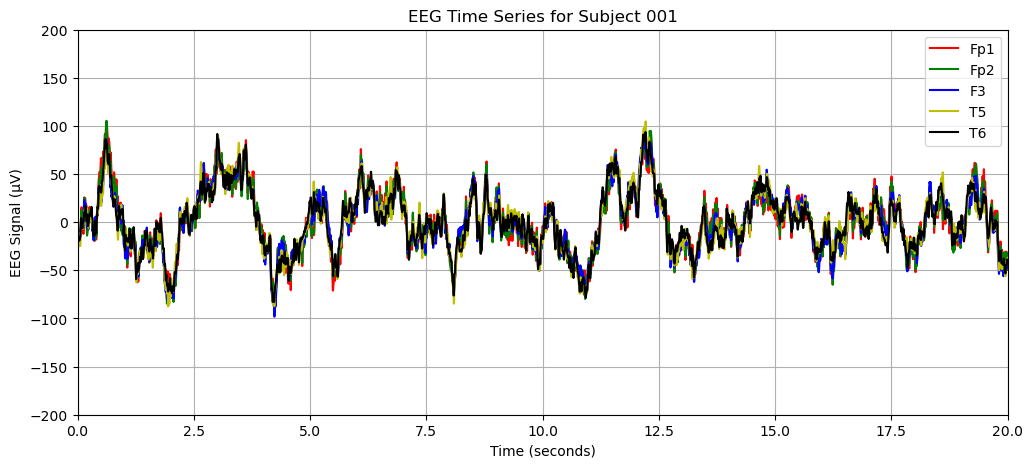

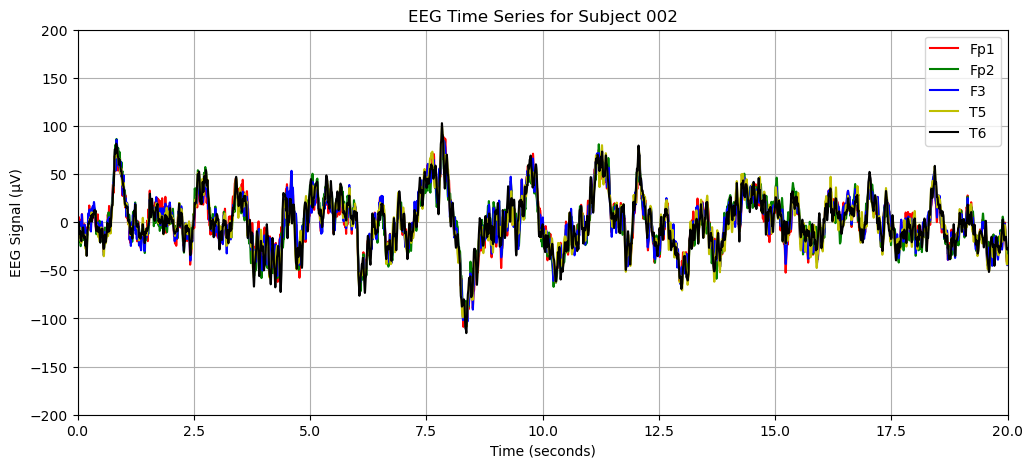

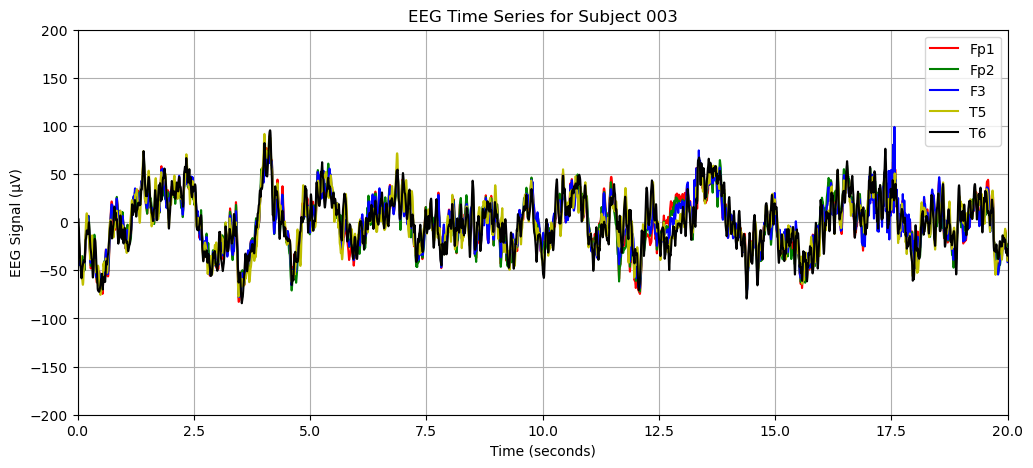

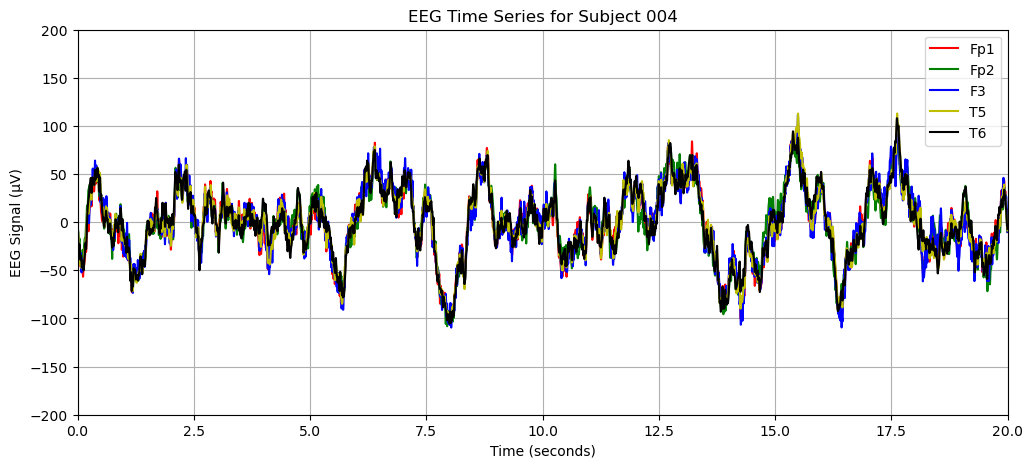

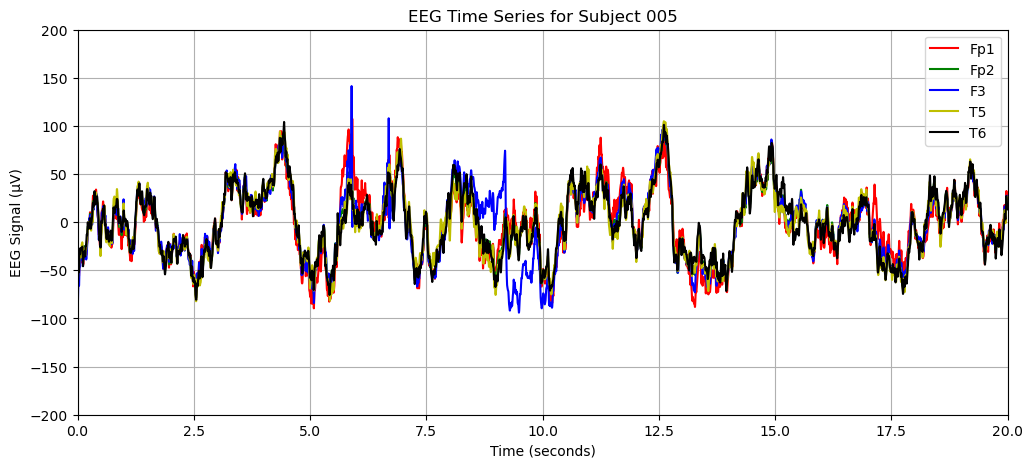

In [30]:
AD_subjects = [processed_AD_1,processed_AD_2,processed_AD_3,processed_AD_4,processed_AD_5]
AD_subjectID = ['Subject 001','Subject 002','Subject 003','Subject 004','Subject 005']
for subject_data,subject_id in zip(AD_subjects,AD_subjectID):
    plot_eeg_time_series(eeg_data = subject_data,subject_id=subject_id)

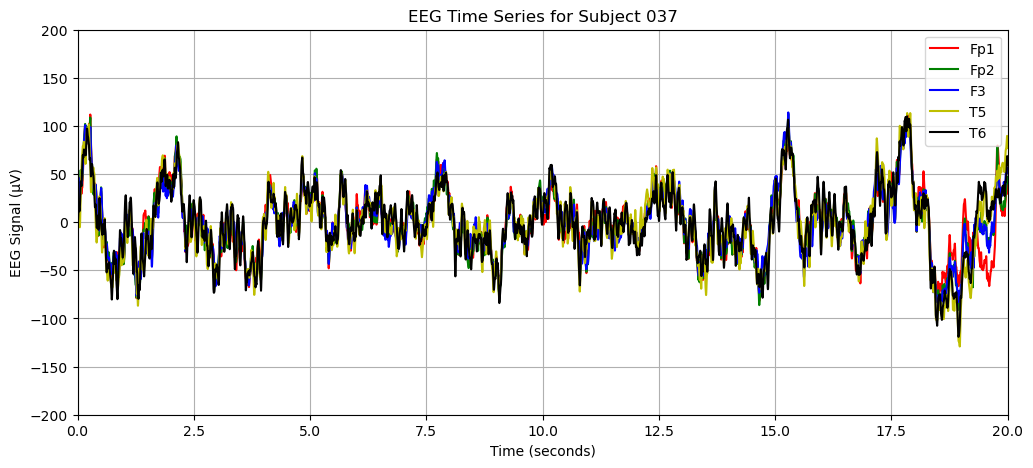

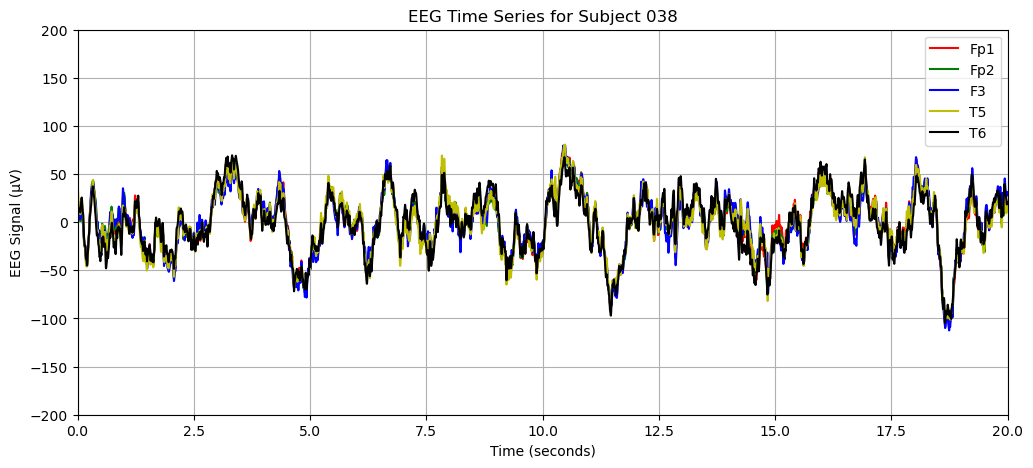

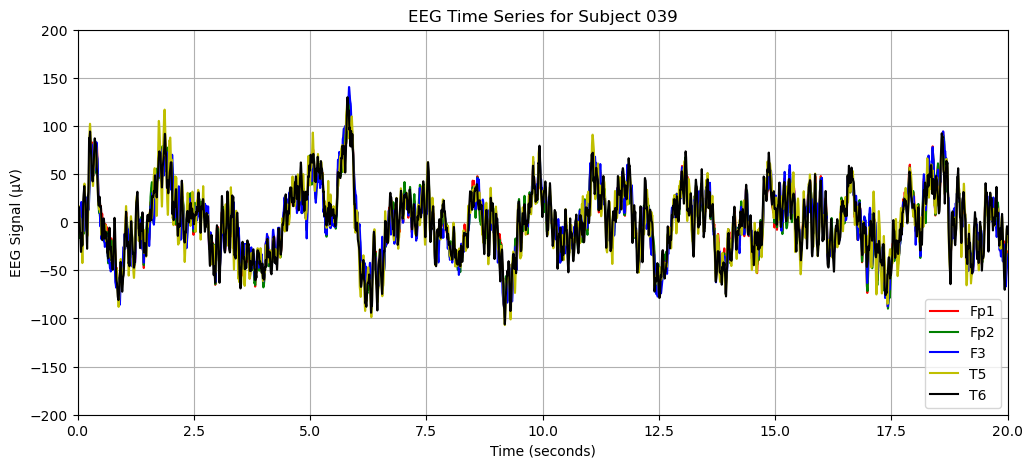

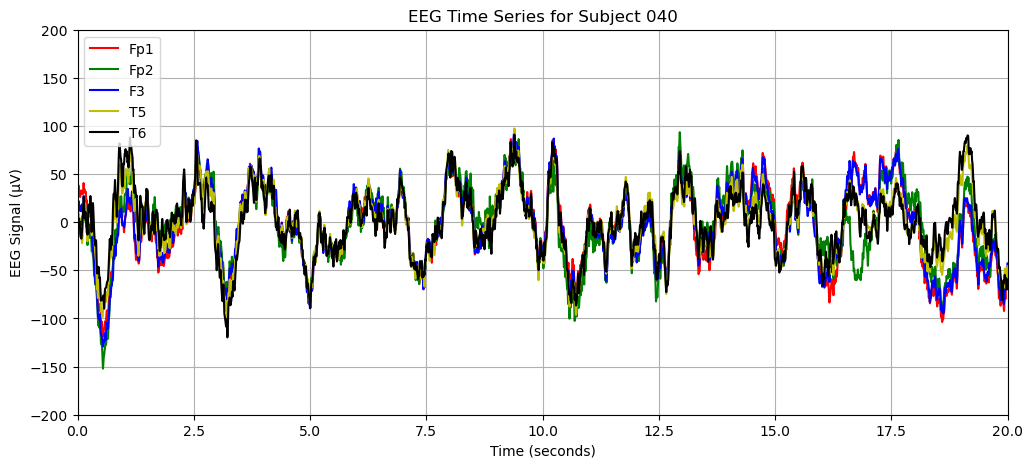

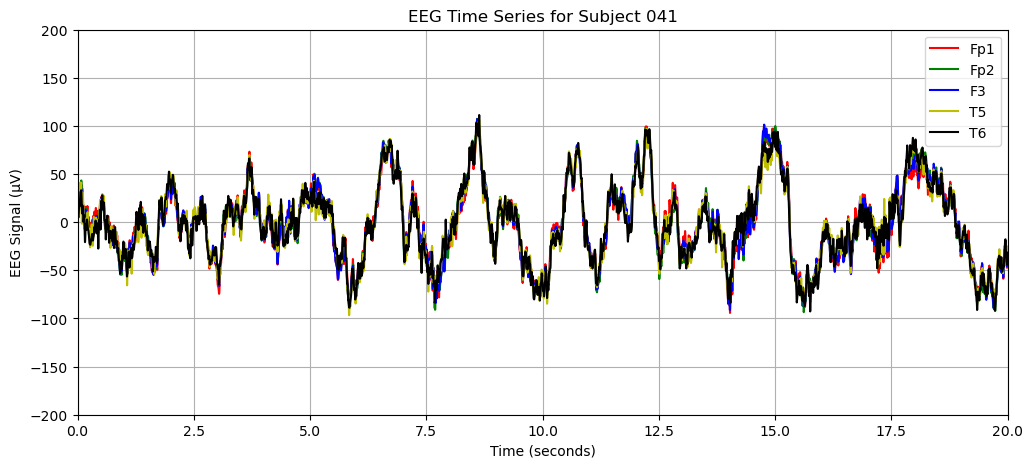

In [31]:
C_subjects = [processed_C_37,processed_C_38,processed_C_39,processed_C_40,processed_C_41]
C_subjectID = ['Subject 037','Subject 038','Subject 039','Subject 040','Subject 041']
for subject_data,subject_id in zip(C_subjects,C_subjectID):
    plot_eeg_time_series(eeg_data = subject_data,subject_id=subject_id)

In [32]:
ad_psd_list = []       
control_psd_list = []  
frequencies = None     

# Compute PSD for AD subjects
for subject_data,subject_id in zip(AD_subjects,AD_subjectID):
    f, psd = compute_psd_welch(subject_data, fs=500)
    
    if frequencies is None:
        frequencies = f  # Save the frequency bins on first pass
    
    ad_psd_list.append(psd)
    print(f"Computed PSD for AD subject {subject_id} -> PSD shape: {psd.shape}")

# Compute PSD for Control subjects
for subject_data,subject_id in zip(C_subjects,C_subjectID):
    f, psd = compute_psd_welch(subject_data, fs=500)
        
    control_psd_list.append(psd)
    print(f"Computed PSD for Control subject {subject_id} -> PSD shape: {psd.shape}")

print("\n=== Done computing PSDs ===")
print(f"Frequencies shape: {frequencies.shape}")  # e.g., (n_freq_bins,)
print(f"Number of AD PSDs: {len(ad_psd_list)}")
print(f"Number of Control PSDs: {len(control_psd_list)}")

Computed PSD for AD subject Subject 001 -> PSD shape: (19, 513)
Computed PSD for AD subject Subject 002 -> PSD shape: (19, 513)
Computed PSD for AD subject Subject 003 -> PSD shape: (19, 513)
Computed PSD for AD subject Subject 004 -> PSD shape: (19, 513)
Computed PSD for AD subject Subject 005 -> PSD shape: (19, 513)
Computed PSD for Control subject Subject 037 -> PSD shape: (19, 513)
Computed PSD for Control subject Subject 038 -> PSD shape: (19, 513)
Computed PSD for Control subject Subject 039 -> PSD shape: (19, 513)
Computed PSD for Control subject Subject 040 -> PSD shape: (19, 513)
Computed PSD for Control subject Subject 041 -> PSD shape: (19, 513)

=== Done computing PSDs ===
Frequencies shape: (513,)
Number of AD PSDs: 5
Number of Control PSDs: 5


In [34]:
# Define frequency bands
theta_idx = np.logical_and(frequencies >= 4, frequencies <= 7)
alpha_idx = np.logical_and(frequencies >= 8, frequencies <= 12)
gamma_idx = np.logical_and(frequencies >= 30, frequencies <= 45)

# For AD Subjects
ad_band_power_list = []  

for i, psd_array in enumerate(ad_psd_list, start=1):
    # Compute average power per channel over each frequency band
    theta_power = np.mean(psd_array[:, theta_idx], axis=1)
    alpha_power = np.mean(psd_array[:, alpha_idx], axis=1)
    gamma_power = np.mean(psd_array[:, gamma_idx], axis=1)
    
    # Store the computed band power in a dictionary for this subject
    subject_band_power = {
        "theta": theta_power,
        "alpha": alpha_power,
        "gamma": gamma_power
    }
    ad_band_power_list.append(subject_band_power)

# For Control Subjects
control_band_power_list = [] 

for i, psd_array in enumerate(control_psd_list, start=1):
    theta_power = np.mean(psd_array[:, theta_idx], axis=1)
    alpha_power = np.mean(psd_array[:, alpha_idx], axis=1)
    gamma_power = np.mean(psd_array[:, gamma_idx], axis=1)
    
    
    subject_band_power = {
        "theta": theta_power,
        "alpha": alpha_power,
        "gamma": gamma_power
    }
    control_band_power_list.append(subject_band_power)


In [35]:
from scipy.stats import ttest_ind

# Average across channels for each subject to get one value per frequency band per subject.
ad_theta = np.array([np.mean(subject["theta"]) for subject in ad_band_power_list])
ad_alpha = np.array([np.mean(subject["alpha"]) for subject in ad_band_power_list])
ad_gamma = np.array([np.mean(subject["gamma"]) for subject in ad_band_power_list])

control_theta = np.array([np.mean(subject["theta"]) for subject in control_band_power_list])
control_alpha = np.array([np.mean(subject["alpha"]) for subject in control_band_power_list])
control_gamma = np.array([np.mean(subject["gamma"]) for subject in control_band_power_list])

# Independent two-sample t-tests for each frequency band
t_theta, p_theta = ttest_ind(ad_theta, control_theta)
t_alpha, p_alpha = ttest_ind(ad_alpha, control_alpha)
t_gamma, p_gamma = ttest_ind(ad_gamma, control_gamma)

print("Theta Band: t-statistic = {:.3f}, p-value = {:.3f}".format(t_theta, p_theta))
print("Alpha Band: t-statistic = {:.3f}, p-value = {:.3f}".format(t_alpha, p_alpha))
print("Gamma Band: t-statistic = {:.3f}, p-value = {:.3f}".format(t_gamma, p_gamma))

Theta Band: t-statistic = 1.309, p-value = 0.227
Alpha Band: t-statistic = -1.593, p-value = 0.150
Gamma Band: t-statistic = -0.107, p-value = 0.918


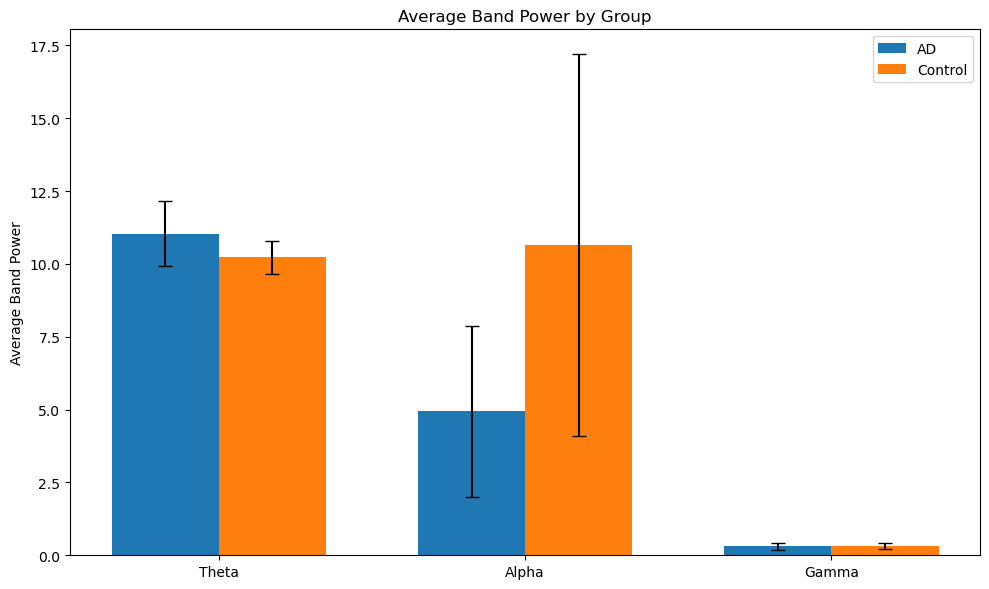

In [36]:
# Define band names and group data
bands = ['Theta', 'Alpha', 'Gamma']
# Group data for boxplots:
group_data = [
    [ad_theta, control_theta],
    [ad_alpha, control_alpha],
    [ad_gamma, control_gamma]
]

# Compute means and standard deviations for each band and group.
ad_means = [
    np.mean(ad_theta),
    np.mean(ad_alpha),
    np.mean(ad_gamma)
]
control_means = [
    np.mean(control_theta),
    np.mean(control_alpha),
    np.mean(control_gamma)
]

ad_std = [
    np.std(ad_theta),
    np.std(ad_alpha),
    np.std(ad_gamma)
]
control_std = [
    np.std(control_theta),
    np.std(control_alpha),
    np.std(control_gamma)
]

x = np.arange(len(bands))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, ad_means, width, yerr=ad_std, capsize=5, label='AD')
rects2 = ax.bar(x + width/2, control_means, width, yerr=control_std, capsize=5, label='Control')

ax.set_ylabel('Average Band Power')
ax.set_title('Average Band Power by Group')
ax.set_xticks(x)
ax.set_xticklabels(bands)
ax.legend()

plt.tight_layout()
plt.show()